# KUIS 2 Pembelajaran Mesin

## Tentang dataset

Pada sebuah lembaga kemanusiaan berbasis teknologi informasi, dibentuk beberapa tim kemanusiaan yang bertugas untuk terjun ke masyarakat memberikan bantuan dalam bentuk aplikasi komputer atau layanan pelatihan IT.  Kegiatn tersebut dilaksanakan setiap tahun dengan ketentuan anggota organisasi tersebut dapat bergabung ke beberapa tim sebagai ketua atau anggota. Terdapat pula anggota yang sudah tidak aktif di organisasi tersebut (terhapus di database mereka —> label N/A).  Organisasi tersebut juga melakukan rekrutmen volunteer, namun tidak semua tim menggunakan bantuan volunteer. Hasil kegiatan dari setiap tim dapat diwujudkan ke dalam sebuah pengakuan hak cipta atau publikasi karya ilmiah atau publikasi berita di media massa.

## Ketentuan
1. Pengerjaan secara individu alias setiap mahasiswa!
2. Terdapat data dengan nilai #N/A, pertimbangkan cara terbaik untuk mengatasi nilai tersebut.
3. Tidak boleh ada duplikasi pekerjaan antar mahasiswa
4. Berikan penjelasan untuk setiap tahapan. Jangan hanya kode!

## Soal
1. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (10 poin)
2. Tentukan data validasi! (10 poin)
3. Tentukan secara tepat kolom yang menjadi "label" (20 poin)
4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
5. Lakukan tunning hyperparameter berdasarkan hasil klasifikasi pada nomor 3 menggunakan metode Grid Search dan Random Search! Simpulkan parameter apa yang paling baik digunakan berdasarkan metode klasifikasi yang dipilih, dan berapa akurasinya. (40 poin)

In [80]:
import pandas as pd

df = pd.read_excel('data/dataset_quiz.xlsx')

df.head(100)

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,NaN,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,NaN,NaN,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,NaN,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


Cek untuk mengetahui kolom mana saja yang terdapat nilai null.

In [81]:
# check missing value
df.isnull().sum()


id_ketua               3
id_anggota1            5
id_anggota2            4
id_anggota3            3
id_anggota4           13
id_anggota5           84
keterlibatan_vltr      0
jml_vltr_terlibat      0
tahun                  0
skema                  0
luaran_hki             0
jenis_luaran_hki       0
potensi_hki            0
luaran_lain            0
jenis_luaran_lain      0
status_luaran_lain     0
dtype: int64

Membuang kolom id_anggota5 dikarenakan hampir keseluruhan datanya adalah null.

In [82]:
# remove id_anggota5
df.drop('id_anggota5', axis=1, inplace=True)


Inpute data yang null dengan menggunakan interpolation methode linear.

In [83]:

# interpolation the missing value
df.interpolate(inplace=True, method='linear')
df


,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,8803.0,8804.0,9102.0,8005.0,9303.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
81,6211.0,8901.0,9003.0,9303.0,9007.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
82,8601.0,8903.0,8703.0,9202.5,7605.5,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
83,8703.0,8601.0,9202.0,9102.0,6204.0,YA,3,2022,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


Mengecek kembali apakah data sudah tidak ada yang null.

In [84]:
df.isnull().sum()

id_ketua              0
id_anggota1           0
id_anggota2           0
id_anggota3           0
id_anggota4           0
keterlibatan_vltr     0
jml_vltr_terlibat     0
tahun                 0
skema                 0
luaran_hki            0
jenis_luaran_hki      0
potensi_hki           0
luaran_lain           0
jenis_luaran_lain     0
status_luaran_lain    0
dtype: int64

Membulatkan hasil inpute data, dikarenakan data yang lain tidak memiliki angka dibelakang koma.

In [85]:
# round the value from id_anggota1 to id_anggota4
df['id_anggota1'] = df['id_anggota1'].round(0)
df['id_anggota2'] = df['id_anggota2'].round(0)
df['id_anggota3'] = df['id_anggota3'].round(0)
df['id_anggota4'] = df['id_anggota4'].round(0)

### Encode Label

Encode categorical data ke numeric dengan menggunakan LabelEncoder

In [86]:
# encode categorical data
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# keterlibatan_vltr
df['keterlibatan_vltr'] = le.fit_transform(df['keterlibatan_vltr'])

# skema
df['skema'] = le.fit_transform(df['skema'])

# luaran_hki
df['luaran_hki'] = le.fit_transform(df['luaran_hki'])

# jenis_luaran_hki
df['jenis_luaran_hki'] = le.fit_transform(df['jenis_luaran_hki'])

# potensi_hki
df['potensi_hki'] = le.fit_transform(df['potensi_hki'])

# luaran_lain
df['luaran_lain'] = le.fit_transform(df['luaran_lain'])

# jenis_luaran_lain
df['jenis_luaran_lain'] = le.fit_transform(df['jenis_luaran_lain'])

# status_luaran_lain
df['status_luaran_lain'] = le.fit_transform(df['status_luaran_lain'])



Check Heatmap untuk mengetahui korelasi antar kolom.

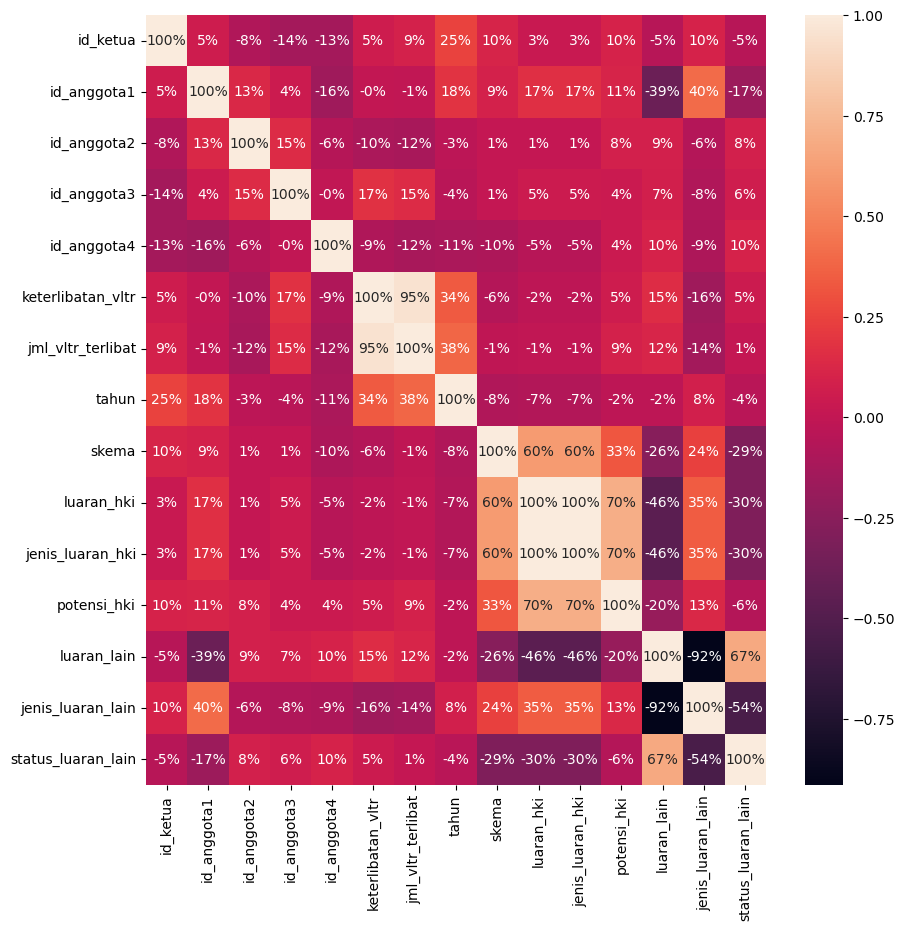

In [87]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
plt.show()



Melihat keseluruhan korelasi antar satu kolom dengan kolom lainnya

In [88]:
df.corr()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
id_ketua,1.000000,0.053366,-0.077946,-0.136770,-0.133216,0.050443,0.092569,0.250474,0.103754,0.027815,0.027815,0.101614,-0.047864,0.098524,-0.048575
id_anggota1,0.053366,1.000000,0.131696,0.043412,-0.155607,-0.001028,-0.009072,0.184063,0.089308,0.165402,0.165402,0.109416,-0.387863,0.402823,-0.167381
id_anggota2,-0.077946,0.131696,1.000000,0.145788,-0.056016,-0.100290,-0.120892,-0.030946,0.009624,0.006347,0.006347,0.081549,0.085524,-0.063073,0.081803
id_anggota3,-0.136770,0.043412,0.145788,1.000000,-0.004135,0.174253,0.146513,-0.043466,0.006057,0.049205,0.049205,0.035476,0.074445,-0.080482,0.060258
id_anggota4,-0.133216,-0.155607,-0.056016,-0.004135,1.000000,-0.091377,-0.117442,-0.106749,-0.097942,-0.053783,-0.053783,0.037289,0.101590,-0.093008,0.100254
keterlibatan_vltr,0.050443,-0.001028,-0.100290,0.174253,-0.091377,1.000000,0.952839,0.339123,-0.064818,-0.018993,-0.018993,0.051220,0.148970,-0.157246,0.048569
jml_vltr_terlibat,0.092569,-0.009072,-0.120892,0.146513,-0.117442,0.952839,1.000000,0.384929,-0.010188,-0.007553,-0.007553,0.088556,0.115534,-0.143411,0.005038
tahun,0.250474,0.184063,-0.030946,-0.043466,-0.106749,0.339123,0.384929,1.000000,-0.084483,-0.073855,-0.073855,-0.022253,-0.020649,0.079175,-0.044313
skema,0.103754,0.089308,0.009624,0.006057,-0.097942,-0.064818,-0.010188,-0.084483,1.000000,0.604367,0.604367,0.325960,-0.263344,0.244221,-0.294372
luaran_hki,0.027815,0.165402,0.006347,0.049205,-0.053783,-0.018993,-0.007553,-0.073855,0.604367,1.000000,1.000000,0.700443,-0.463221,0.347518,-0.298887


Melihat korelasi yang lebih dari 0.5, yang berarti itu memiliki korelasi tinggi yang seharusnya tidak digunakan sebagai fitur.

In [89]:
# choose only the correlation that has value more than 0.5
df.corr()[df.corr() > 0.5]


,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
id_ketua,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_anggota1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_anggota2,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_anggota3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_anggota4,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
keterlibatan_vltr,NaN,NaN,NaN,NaN,NaN,1.000000,0.952839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jml_vltr_terlibat,NaN,NaN,NaN,NaN,NaN,0.952839,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tahun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.604367,0.604367,NaN,NaN,NaN,NaN
luaran_hki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.604367,1.000000,1.000000,0.700443,NaN,NaN,NaN


## 3. Tentukan secara tepat kolom yang menjadi "label" (20 poin)
### Menambahkan kolom yang akan saya gunakan sebagai label

Jadi, saya menentukan labelnya adalah luaran_hki dan luaran_lain. Yang berarti, pada intinya saya akan memprediksi apakah dengan susunan tim yang terbentuk dam adanya volunteer serta tahun dan skema mereka bisa menciptakan luaran. Jadi, saya menggabungkan antara luaran_hki dan luaran_lain menjadi satu label saja, yaitu ya (1) atau tidak (0).

In [90]:

def luaran(x):
    if x['luaran_hki'] == 1 or x['luaran_lain'] == 1:
        return 1
    else:
        return 0

df['luaran'] = df.apply(luaran, axis=1)


### Splitting data 

Split data dengan korelasi data yang rendah dan membuang yang masih memiliki korelasi tinggi.

In [91]:

X = df.iloc[:, 0:9]
y = df.iloc[:, -1]
X.drop('keterlibatan_vltr', axis=1, inplace=True)

# Standardization
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)


In [92]:
# balance the data with oversampling using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)



## 1. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (10 poin)
#### Split data training dan testing, 80% untuk training 20% untuk testing

In [93]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


## 2. Tentukan data validasi! (10 poin)
### Memecah data training menjadi training dan evaluation

In [94]:

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## 4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)

Disini saya menggunakan Rnadom Forest Classifier dan Linear SVC

## Using Random Forest Classifier Model

In [95]:
# create the model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

# using GRID SEARCH CV
from sklearn.model_selection import GridSearchCV

parameters = [{'n_estimators': [10, 100, 1000], 'criterion': ['entropy', 'gini'], 'max_depth': [10, 100, 1000], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}]

grid_search = GridSearchCV(estimator=random_forest,
                            param_grid=parameters,
                            scoring='accuracy',
                            cv=10,
                            n_jobs=-1)

grid_search = grid_search.fit(X_val, y_val)


# get the best accuracy
best_accuracy = grid_search.best_score_

# get the best parameters
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f} %'.format(best_accuracy*100))
print('Best Parameters:', best_parameters)




Best Accuracy: 96.67 %
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Using Linear SVC 

In [96]:
# Create Model using Linear SVC and implement RandomizedSearchCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'max_iter': [ 1000000, 10000000, 100000000, 1000000000],
    'tol': [0.0001, 0.001, 0.01, 0.1, 1],
    

}

# Create a based model
svc = LinearSVC()

# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = svc, param_distributions = param_grid, n_jobs = -1, verbose = 2, error_score='raise')

# Fit the grid search to the data
grid_search.fit(X_val, y_val)

# get the best accuracy
best_accuracy = grid_search.best_score_

# get the best parameters
best_parameters = grid_search.best_params_

print('Best Accuracy: {:.2f} %'.format(best_accuracy*100))
print('Best Parameters:', best_parameters)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...............C=0.1, max_iter=1000000000, tol=0.01; total time=   0.0s
[CV] END ...............C=0.1, max_iter=1000000000, tol=0.01; total time=   0.0s
[CV] END ...............C=0.1, max_iter=1000000000, tol=0.01; total time=   0.0s
[CV] END ...............C=0.1, max_iter=1000000000, tol=0.01; total time=   0.0s
[CV] END ...............C=0.1, max_iter=1000000000, tol=0.01; total time=   0.0s
[CV] END ................C=100, max_iter=100000000, tol=0.01; total time=   0.0s
[CV] END ................C=100, max_iter=100000000, tol=0.01; total time=   0.0s
[CV] END ................C=100, max_iter=100000000, tol=0.01; total time=   0.0s
[CV] END ................C=100, max_iter=100000000, tol=0.01; total time=   0.0s
[CV] END ................C=100, max_iter=100000000, tol=0.01; total time=   0.0s
[CV] END .............C=1000, max_iter=1000000000, tol=0.001; total time=   0.0s
[CV] END .............C=1000, max_iter=100000000

## 5. Lakukan tunning hyperparameter berdasarkan hasil klasifikasi pada nomor 3 menggunakan metode Grid Search dan Random Search! Simpulkan parameter apa yang paling baik digunakan berdasarkan metode klasifikasi yang dipilih, dan berapa akurasinya. (40 poin)

Saya menggunakan Grid Search pada RandomForest dan Randomized Search pada LinearSVC. Parameter yang paling baik adalah
``` 
Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 96.67 %
```

[[14  0]
 [ 1 19]]
Accuracy of Random Forest classifier on test set: 0.97


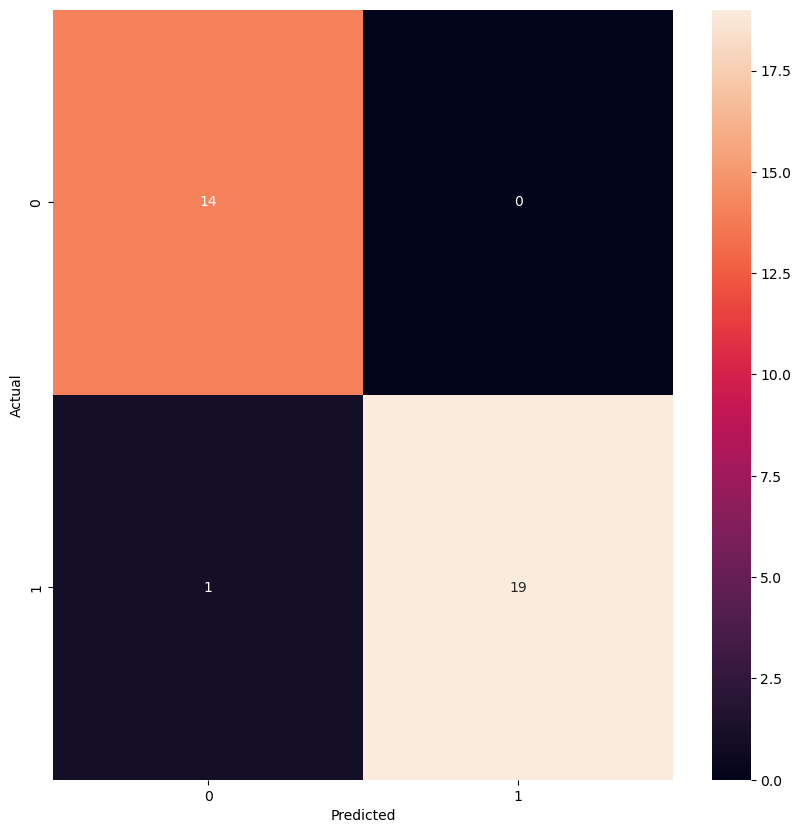

In [97]:
# create the model
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, min_samples_split=2, min_samples_leaf=1)

# fit the model
random_forest.fit(X_train, y_train)

# predict the test set result
y_pred = random_forest.predict(X_test)


# plot the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)

print(cm)

print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(accuracy_score(y_test, y_pred)))


# plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


